In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [12]:
path = '/Users/arun/Galvanize/Capstone1'

In [14]:
# read the covid19_deaths data
df_c19d = pd.read_csv(path + '/Data/COVID19DeathsData/COVID19-Deaths-20200717.csv', delimiter=',') 
df_c19d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4761 entries, 0 to 4760
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data as of                                4761 non-null   object 
 1   Start week                                4761 non-null   object 
 2   End Week                                  4761 non-null   object 
 3   State                                     4761 non-null   object 
 4   Age group                                 4761 non-null   object 
 5   Race and Hispanic Origin Group            4761 non-null   object 
 6   COVID-19 Deaths                           3794 non-null   float64
 7   Total Deaths                              3206 non-null   float64
 8   Pneumonia Deaths                          3606 non-null   float64
 9   Pneumonia and COVID-19 Deaths             3950 non-null   float64
 10  Influenza Deaths                    

In [15]:
# These are deaths as of 
# sanity checks
# what are the total deaths
df_c19d['COVID-19 Deaths'].sum()

482879.0

### 482879 COVID deaths! That's not right! Turns out, the data has rows for State = 'United States' with totals in it. Drop these rows.

### Also, drop Puerto Rico data because we have no census data for Puerto Rico

In [16]:
# create a new df excluding the row for 'State' = 'United States'
df_c19d_so = df_c19d[(df_c19d.State != 'Puerto Rico') & (df_c19d.State != 'United States')]

In [17]:
df_c19d_so['COVID-19 Deaths'].sum()

118626.0

### Now change all State = 'New York City' to 'New York'

In [18]:
df_c19d_so.State[df_c19d_so.State == 'New York City'] = 'New York'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### 118626 deaths is a number that checks out with what we know.

In [19]:
df_c19d_so.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4576 entries, 97 to 4672
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data as of                                4576 non-null   object 
 1   Start week                                4576 non-null   object 
 2   End Week                                  4576 non-null   object 
 3   State                                     4576 non-null   object 
 4   Age group                                 4576 non-null   object 
 5   Race and Hispanic Origin Group            4576 non-null   object 
 6   COVID-19 Deaths                           3616 non-null   float64
 7   Total Deaths                              3044 non-null   float64
 8   Pneumonia Deaths                          3432 non-null   float64
 9   Pneumonia and COVID-19 Deaths             3773 non-null   float64
 10  Influenza Deaths                   

In [20]:
# Now let's group by state
df_c19d_so_State = df_c19d_so.groupby(['State']).sum()

In [21]:
df_c19d_so_State.head(55)

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
State,,,,,,
Alabama,1014.0,24256.0,1593.0,288.0,45.0,2408.0
Alaska,0.0,1582.0,21.0,0.0,0.0,45.0
Arizona,1538.0,30782.0,2491.0,780.0,51.0,3356.0
Arkansas,203.0,14359.0,896.0,35.0,41.0,1124.0
California,5786.0,127986.0,11702.0,3197.0,481.0,14902.0
Colorado,1529.0,19613.0,1744.0,773.0,53.0,2608.0
Connecticut,3793.0,14587.0,1483.0,822.0,47.0,4528.0
Delaware,471.0,4374.0,340.0,161.0,0.0,665.0
District of Columbia,541.0,3264.0,706.0,534.0,0.0,718.0


In [22]:
df_c19d_so_State

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
State,,,,,,
Alabama,1014.0,24256.0,1593.0,288.0,45.0,2408.0
Alaska,0.0,1582.0,21.0,0.0,0.0,45.0
Arizona,1538.0,30782.0,2491.0,780.0,51.0,3356.0
Arkansas,203.0,14359.0,896.0,35.0,41.0,1124.0
California,5786.0,127986.0,11702.0,3197.0,481.0,14902.0
Colorado,1529.0,19613.0,1744.0,773.0,53.0,2608.0
Connecticut,3793.0,14587.0,1483.0,822.0,47.0,4528.0
Delaware,471.0,4374.0,340.0,161.0,0.0,665.0
District of Columbia,541.0,3264.0,706.0,534.0,0.0,718.0


In [23]:
df_c19d_so_State['COVID-19 Deaths'].sum()

118626.0

In [24]:
x = df_c19d_so_State.index
x

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

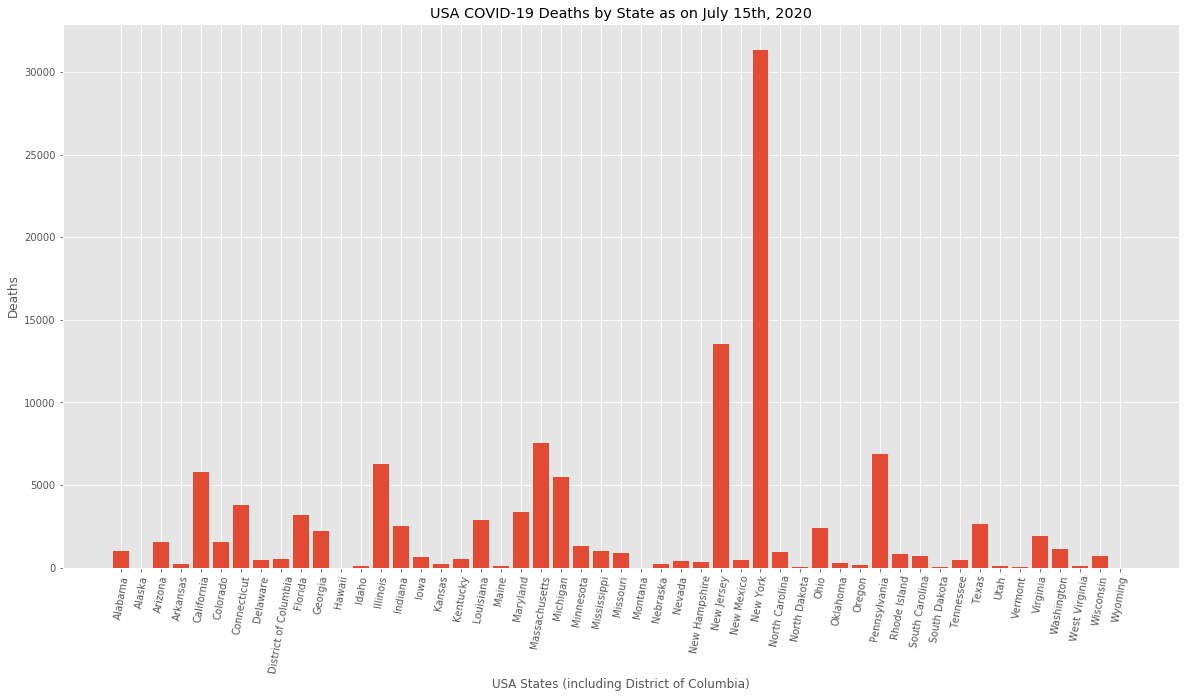

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("USA COVID-19 Deaths by State as on July 15th, 2020")
ax.set_xlabel("USA States (including District of Columbia)")
ax.set_ylabel("Deaths")

#ax.set_xticks(len(df_c19d_so_State.index))
ax.set_xticklabels(df_c19d_so_State.index)
ax.tick_params(axis='x', rotation=80)

x = df_c19d_so_State.index
y = df_c19d_so_State['COVID-19 Deaths']
_ = ax.bar(x, y )


# df_c19d_State.plot()

# Now let's look at the population data

In [28]:
# read the census data by state
df_pop = pd.read_csv(path + '/Data/CensusData/CensusDataByState.txt', delimiter='\t') 
df_pop.head(55)

,Notes,State,State Code,Population
0,NaN,Alabama,1.0,4887871.0
1,NaN,Alaska,2.0,737438.0
2,NaN,Arizona,4.0,7171646.0
3,NaN,Arkansas,5.0,3013825.0
4,NaN,California,6.0,39557045.0
5,NaN,Colorado,8.0,5695564.0
6,NaN,Connecticut,9.0,3572665.0
7,NaN,Delaware,10.0,967171.0
8,NaN,District of Columbia,11.0,702455.0
9,NaN,Florida,12.0,21299325.0


In [29]:
df_pop = df_pop.iloc[0:51, ]

In [30]:
df_pop = df_pop.loc[:, ['State', 'Population']]

In [31]:
df_pop

,State,Population
0,Alabama,4887871.0
1,Alaska,737438.0
2,Arizona,7171646.0
3,Arkansas,3013825.0
4,California,39557045.0
5,Colorado,5695564.0
6,Connecticut,3572665.0
7,Delaware,967171.0
8,District of Columbia,702455.0
9,Florida,21299325.0


In [32]:
df_c19d_so_State_Pop = df_c19d_so_State.merge(df_pop, how='inner', left_on='State', right_on='State')
# golf_df.merge(mood_df, how='inner', left_on='Outlook', right_on='Weather')
df_c19d_so_State_Pop

,State,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Population
0,Alabama,1014.0,24256.0,1593.0,288.0,45.0,2408.0,4887871.0
1,Alaska,0.0,1582.0,21.0,0.0,0.0,45.0,737438.0
2,Arizona,1538.0,30782.0,2491.0,780.0,51.0,3356.0,7171646.0
3,Arkansas,203.0,14359.0,896.0,35.0,41.0,1124.0,3013825.0
4,California,5786.0,127986.0,11702.0,3197.0,481.0,14902.0,39557045.0
5,Colorado,1529.0,19613.0,1744.0,773.0,53.0,2608.0,5695564.0
6,Connecticut,3793.0,14587.0,1483.0,822.0,47.0,4528.0,3572665.0
7,Delaware,471.0,4374.0,340.0,161.0,0.0,665.0,967171.0
8,District of Columbia,541.0,3264.0,706.0,534.0,0.0,718.0,702455.0
9,Florida,3181.0,99747.0,7546.0,1628.0,227.0,9390.0,21299325.0


In [33]:
df_c19d_so_State_Pop['COVID-19 Deaths per 100000'] = \
    round(df_c19d_so_State_Pop['COVID-19 Deaths'] / df_c19d_so_State_Pop['Population'] * 100000, 2)

In [34]:
df_c19d_so_State_Pop

,State,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Population,COVID-19 Deaths per 100000
0,Alabama,1014.0,24256.0,1593.0,288.0,45.0,2408.0,4887871.0,20.75
1,Alaska,0.0,1582.0,21.0,0.0,0.0,45.0,737438.0,0.00
2,Arizona,1538.0,30782.0,2491.0,780.0,51.0,3356.0,7171646.0,21.45
3,Arkansas,203.0,14359.0,896.0,35.0,41.0,1124.0,3013825.0,6.74
4,California,5786.0,127986.0,11702.0,3197.0,481.0,14902.0,39557045.0,14.63
5,Colorado,1529.0,19613.0,1744.0,773.0,53.0,2608.0,5695564.0,26.85
6,Connecticut,3793.0,14587.0,1483.0,822.0,47.0,4528.0,3572665.0,106.17
7,Delaware,471.0,4374.0,340.0,161.0,0.0,665.0,967171.0,48.70
8,District of Columbia,541.0,3264.0,706.0,534.0,0.0,718.0,702455.0,77.02
9,Florida,3181.0,99747.0,7546.0,1628.0,227.0,9390.0,21299325.0,14.93


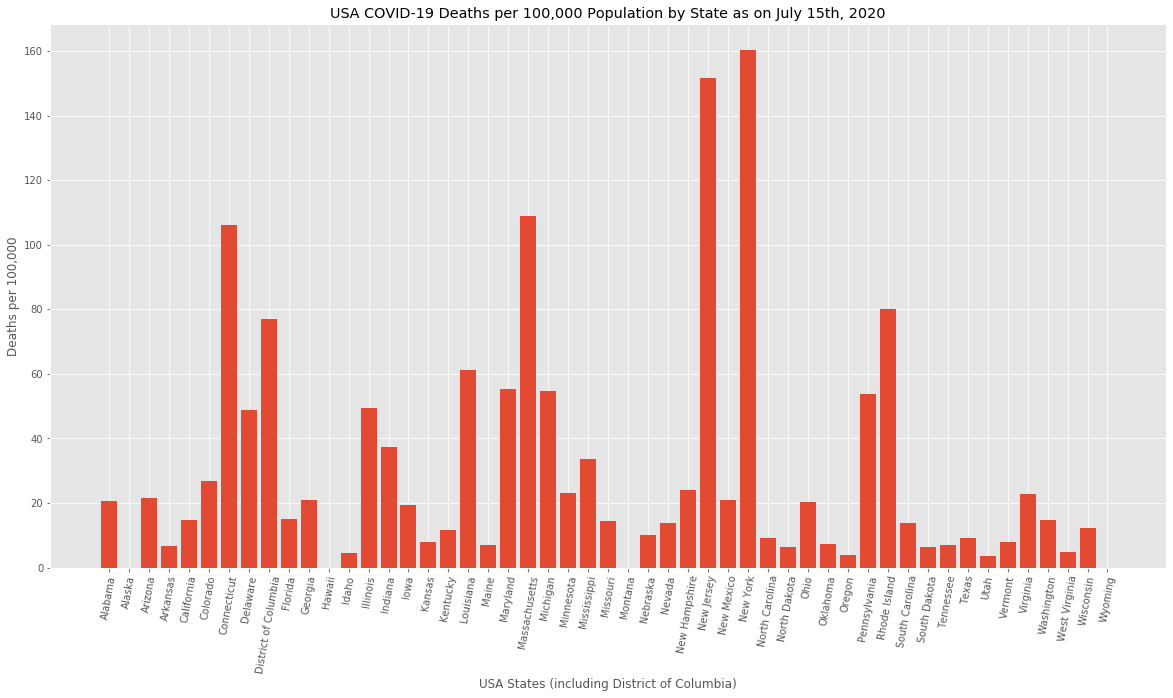

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("USA COVID-19 Deaths per 100,000 Population by State as on July 15th, 2020")
ax.set_xlabel("USA States (including District of Columbia)")
ax.set_ylabel("Deaths per 100,000")

#ax.set_xticks(len(df_c19d_so_State.index))
ax.set_xticklabels(df_c19d_so_State_Pop.State)
ax.tick_params(axis='x', rotation=80)

x = df_c19d_so_State_Pop.State
y = df_c19d_so_State_Pop['COVID-19 Deaths per 100000']
_ = ax.bar(x, y )


### Store the key dfs as csv files

In [37]:
# Store the cleaned data grouped by states, with deaths per 100,000 population
df_c19d_so_State_Pop.to_csv(path + '/Data/OutputData/df_c19d_so_State_Pop.csv', index=False)

In [38]:
# Store the cleaned deaths data set with United States, Puerto Rico and 
# NYC numbers merged into New York state - this can be the new starting point for the next analyses
df_c19d_so.to_csv(path + '/Data/OutputData/df_c19d_so.csv', index=False)

## Get population data by State and ethicity/race

In [39]:
df_pop_state_race = pd.read_csv(path + '/Data/CensusData/CensusDataByStateEthnicityRace.txt', '\t')

In [42]:
df_pop_state_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Notes           182 non-null    object 
 1   State           561 non-null    object 
 2   State Code      561 non-null    float64
 3   Ethnicity       510 non-null    object 
 4   Ethnicity Code  510 non-null    object 
 5   Race            408 non-null    object 
 6   Race Code       408 non-null    object 
 7   Population      562 non-null    float64
dtypes: float64(2), object(6)
memory usage: 37.0+ KB


In [43]:
# take rows where the population is NOT null/NaN
df_pop_state_race = df_pop_state_race[df_pop_state_race.Population.notna()]



In [44]:
df_pop_state_race.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 562 entries, 0 to 561
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Notes           154 non-null    object 
 1   State           561 non-null    object 
 2   State Code      561 non-null    float64
 3   Ethnicity       510 non-null    object 
 4   Ethnicity Code  510 non-null    object 
 5   Race            408 non-null    object 
 6   Race Code       408 non-null    object 
 7   Population      562 non-null    float64
dtypes: float64(2), object(6)
memory usage: 39.5+ KB


In [51]:
df_pop_state_race = df_pop_state_race[['State', 'Ethnicity', 'Race', 'Population']]

In [52]:
df_pop_state_race

,State,Ethnicity,Race,Population
0,Alabama,Hispanic or Latino,American Indian or Alaska Native,7646.0
1,Alabama,Hispanic or Latino,Asian or Pacific Islander,5033.0
2,Alabama,Hispanic or Latino,Black or African American,17697.0
3,Alabama,Hispanic or Latino,White,186805.0
4,Alabama,Hispanic or Latino,NaN,217181.0
...,...,...,...,...
557,Wyoming,Not Hispanic or Latino,Black or African American,8814.0
558,Wyoming,Not Hispanic or Latino,White,490535.0
559,Wyoming,Not Hispanic or Latino,NaN,519510.0
560,Wyoming,NaN,NaN,577737.0
